In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
import os

from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

from tensorflow.keras.utils import img_to_array,load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
folder_dir = "/content/drive/MyDrive/TensorFlow/sugarcane"
folder_dir2 = "/content/drive/MyDrive/TensorFlow/test1"
train_datagen=ImageDataGenerator(zoom_range = 0.5,shear_range=0.5,rescale=1/255 ,
                                 horizontal_flip=True,
                                 preprocessing_function= preprocess_input)
val_datagen=ImageDataGenerator( preprocessing_function= preprocess_input )


In [ ]:
!ls "/content/drive/MyDrive/TensorFlow/"

 Deep_Learning.ipynb	 'natural learning.ipynb'		'tensorflow_image (1).png'
 Irisdataset.csv	  Primary_Dataset-20240201T091630Z-002	 test_set-20240201T093118Z-001
'MATHS hackathon.ipynb'   sugarcane


In [89]:
train = train_datagen.flow_from_directory(directory=folder_dir,
                                          target_size=(128,128),
                                            batch_size=32)
val=val_datagen.flow_from_directory(directory=folder_dir2,
                                    target_size=(128,128),
                                    batch_size=32)

Found 1040 images belonging to 2 classes.
Found 518 images belonging to 1 classes.


In [ ]:
t_img , label=train.next()

In [ ]:
t_img.shape

(32, 128, 128, 3)

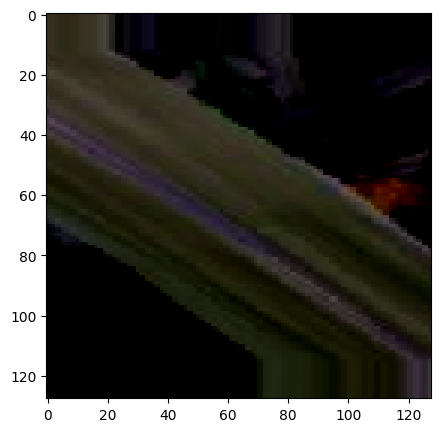

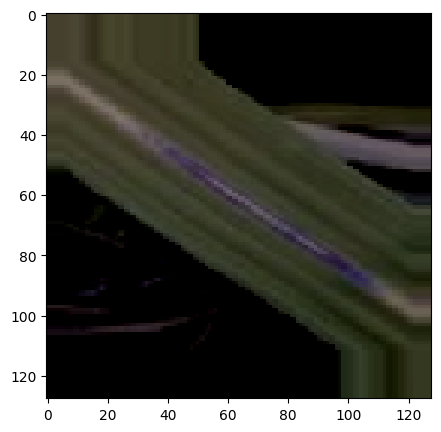

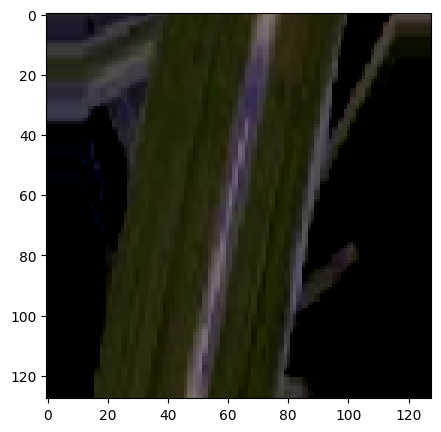

In [ ]:
def plotImage(img_arr,label):
    for im , l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        (plt.imshow(im))

        (plt.show())
plotImage(t_img[:3],label[:3])


In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model=VGG19(input_shape=(128,128,3),include_top=False)

In [ ]:
for layer in base_model.layers:
    layer.trainable=False


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
import tensorflow.keras as kera
from tensorflow.keras import layers
from tensorflow.keras import regularizers
x=Flatten()(base_model.output)
x = layers.Dense(units=128, activation='sigmoid')(x)
x = layers.BatchNormalization()(x)

x=Dense(units=2,activation='softmax')(x)

#  creating our model
model=Model(base_model.input,x)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [91]:
optimiser = keras.optimizers.Adam(learning_rate=0.00012)
model.compile(optimizer=optimiser,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#earlystopping
es=EarlyStopping(monitor='accuracy',min_delta=0.01,patience=8,verbose=1)
es1=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=2,verbose=1)

#model checkpoint
mc=ModelCheckpoint(filepath="best_model.h5",monitor='accuracy',
                   min_delta=0.01,
                   patience=8,
                   verbose=6,
                   save_best_only=True)
mc1=ModelCheckpoint(filepath="best_model2.h5",monitor='val_accuracy',
                   min_delta=0.01,
                   patience=10,
                   verbose=6,
                   save_best_only=True)
cb=[es,mc,es1,mc1]

In [92]:
his=model.fit_generator(train, steps_per_epoch=15, epochs=15, verbose=1,

                    callbacks=cb,
                    validation_data=val,
                    validation_steps=15)

<ipython-input-92-5f7cfb0bdc4b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train, steps_per_epoch=15, epochs=15, verbose=1,


Epoch 1/15
15/15 [==============================] - ETA: 0s - loss: 0.4958 - accuracy: 0.7974 
Epoch 1: accuracy improved from -inf to 0.79741, saving model to best_model.h5

Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to best_model2.h5
15/15 [==============================] - 613s 41s/step - loss: 0.4958 - accuracy: 0.7974 - val_loss: 1.5994 - val_accuracy: 0.2000
Epoch 2/15
15/15 [==============================] - ETA: 0s - loss: 0.1773 - accuracy: 0.9229 
Epoch 2: accuracy improved from 0.79741 to 0.92292, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.20000
15/15 [==============================] - 549s 37s/step - loss: 0.1773 - accuracy: 0.9229 - val_loss: 2.1357 - val_accuracy: 0.0000e+00
Epoch 3/15
15/15 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 0.9612 
Epoch 3: accuracy improved from 0.92292 to 0.96121, saving model to best_model.h5

Epoch 3: val_accuracy did not improve from 0.20000
15/15 [==========

In [94]:
h=his.history
h.keys()
print(h['loss'])
print(h['accuracy'])
print(h['val_loss'])
print(h['val_accuracy'])

[0.4958357512950897, 0.17728421092033386, 0.09933528304100037]
[0.7974137663841248, 0.9229166507720947, 0.9612069129943848]
[1.5994346141815186, 2.135650396347046, 2.495957612991333]
[0.20000000298023224, 0.0, 0.0020833334419876337]


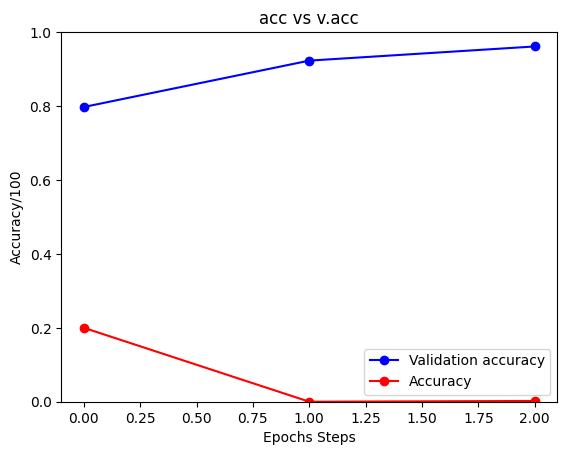

In [95]:
l1,=plt.plot(h['accuracy'],c="blue",marker='o')
l2,=plt.plot(h['val_accuracy'],c="red",marker='o')
plt.legend((l1,l2),["Validation accuracy","Accuracy"],loc="lower right")
plt.xlabel('Epochs Steps')
plt.ylabel('Accuracy/100')
plt.title("acc vs v.acc")
plt.ylim(0,1.00)
plt.show()

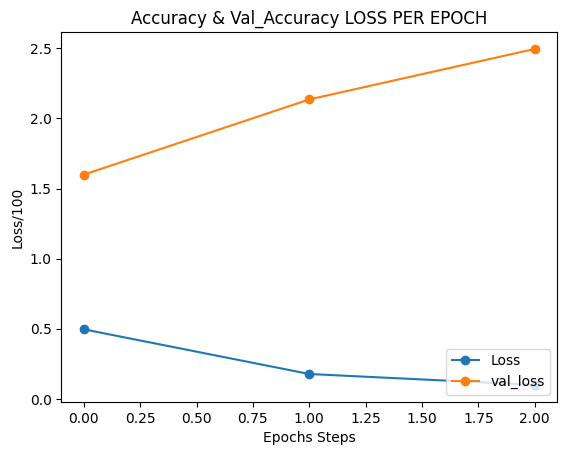

In [96]:
l1,=plt.plot(h['loss'],marker='o')
l2,=plt.plot(h['val_loss'],marker='o')
plt.legend((l1,l2),["Loss","val_loss"],loc="lower right")
# plt.legend(["LOSS"],loc="lower righ/8t")
plt.xlabel('Epochs Steps')
plt.ylabel('Loss/100')
plt.title("Accuracy & Val_Accuracy LOSS PER EPOCH")
plt.show()

In [ ]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [ ]:
acc=model.evaluate_generator(val)[1]
print(f"The accuracy of your model is = {acc*100}%")

<ipython-input-35-0d8924a1c9da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


The accuracy of your model is = 100.0%


In [104]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [105]:
def prediction(path):
  img=load_img(path,target_size=(128,128))
  i=img_to_array(img)
  im=preprocess_input(i)
  # print(im.shape)
  img=np.expand_dims(im,axis=0)
  # print(img.shape)
  pred=np.argmax(model.predict(img))
  # print(pred)
  print(f"The image belongs to {ref[pred]}")

In [107]:
path="/content/drive/MyDrive/TensorFlow/sugarcane/RedRot/redrot (1).jpeg"
prediction(path)

1/1 [==============================] - 0s 251ms/step
The image belongs to RedRot
